# **Introduction/Background**
Customer attrition is one of the biggest expenditures of any
organization. Customer churn otherwise known as customer attrition or
customer turnover is the percentage of customers that stopped using your
company\'s product or service within a specified timeframe.

For instance, if you began the year with **500 customers** but later ended
with **480 customers,** the percentage of customers that left would be **4%.**
If we could figure out **why a customer leaves and when they leave with
reasonable accuracy**, it would immensely help the organization to
strategize their retention initiatives manifold.

In this project, we aim to find the **likelihood of a customer leaving the
organization,** the **key indicators of churn** as well as **the retention
strategies** that can be implemented to avert this problem.

# **Statement Problem / Business Understanding**

A telecommunication company , vodaphone, wants to do a churn analysis on their company customers to try and understand why customers churn or do not churn, and predict whether they would churn or not churn.

They have given us a dataset to do an analysis on and build **Classification Models** to predict either **Churn OR not Churn**

# **Business Goals/ Success Definition**


*  Our findings should help the client innovate better methods, come up with more intelligent solutions and products to maximise customer retention margins by studying and predicting customer outcome.  
*    Create a better ML model with excellent F1 and F2 scores 




In [1]:
# importing necessary libraries 
import pandas as pd 
import numpy as np 

# Visualization libaries
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px

# Import warning filter 
import warnings 
warnings.filterwarnings('ignore')

# Import splitting module 
from sklearn.model_selection import train_test_split

In [2]:
# Forcibly mount gdrive - we're working in colab 

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Read into our dataset

In [3]:
df_ = pd.read_csv('/content/drive/MyDrive/LP3 PROJECT /Telco-Customer-Churn.csv')

In [4]:
df = pd.read_csv('/content/drive/MyDrive/LP3 PROJECT /Telco-Customer-Churn.csv')

df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   
2  3668-QPYBK    Male              0      No         No       2          Yes   
3  7795-CFOCW    Male              0      No         No      45           No   
4  9237-HQITU  Female              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   
2                No             DSL            Yes  ...               No   
3  No phone service             DSL            Yes  ...              Yes   
4                No     Fiber optic             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   
2          No          No              No  Month-to-month              Yes   
3         Yes          No              No        One year               No   
4          No          No              No  Month-to-month              Yes   

               PaymentMethod MonthlyCharges  TotalCharges Churn  
0           Electronic check          29.85         29.85    No  
1               Mailed check          56.95        1889.5    No  
2               Mailed check          53.85        108.15   Yes  
3  Bank transfer (automatic)          42.30       1840.75    No  
4           Electronic check          70.70        151.65   Yes  

[5 rows x 21 columns]

**LOOK AT OUR DATASET AND UNDERSTAND IT**

In [5]:
df.shape

(7043, 21)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
# Look at all the columns 

pd.DataFrame(df.head(0))

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

**INSPECTING FOR DTYPE - IF CORRECT**

In [8]:
# Look at all the columns 

pd.DataFrame(df.head(1))

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  

[1 rows x 21 columns]

In [9]:
# Check for dtype if its correct 

pd.DataFrame(df.dtypes).T

customerID  gender SeniorCitizen Partner Dependents tenure PhoneService  \
0     object  object         int64  object     object  int64       object   

  MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0        object          object         object  ...           object   

  TechSupport StreamingTV StreamingMovies Contract PaperlessBilling  \
0      object      object          object   object           object   

  PaymentMethod MonthlyCharges TotalCharges   Churn  
0        object        float64       object  object  

[1 rows x 21 columns]

In [10]:
# Dtype of senior citizan marked as int64 

# inspect if this is correct 

# whwther it is categorical or numerical 

In [11]:
df['SeniorCitizen'].head()

0    0
1    0
2    0
3    0
4    0
Name: SeniorCitizen, dtype: int64

In [12]:
df['SeniorCitizen'].value_counts

<bound method IndexOpsMixin.value_counts of 0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: SeniorCitizen, Length: 7043, dtype: int64>

In [13]:
df['SeniorCitizen'].unique().sum()

1

The column 'SeniorCitizen' is categorical , but it is listed as numeric / continuous. 
Because it only has 2 entries (I.e Logic 1 and Logic 0) , we will not convert it into a different dtype.

### **issue 1) Convert ['TotalCharges'] from object_dtype to float_dtype**

In [14]:
df['TotalCharges'].dtype

dtype('O')

In [15]:
# convert from object to float 

In [16]:
df['TotalCharges']

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object

In [17]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')



In [18]:
df['TotalCharges'].dtype

dtype('float64')

In [19]:
df['TotalCharges'].isna().sum()

11

**CAUTION / NOTE**

Because we had values that could not be converted to floats , probably string that were in the column, df['TotalCharges'], we couldn't use the asype('Int64') or the astypte(int) or the .apply funtion. 

We used the pd.to_numeric to help in realizing the conversion from categorical to numeric. The other values that are not understandable to pandas , will be converted to **NaN** values , 

In [20]:
# For the new missing values in df['TotalCharges'] , fill them in with the mean

### **Issue 2) Deal with the miising values converted to NaN**

In [21]:
df['TotalCharges'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 7043 entries, 0 to 7042
Series name: TotalCharges
Non-Null Count  Dtype  
--------------  -----  
7032 non-null   float64
dtypes: float64(1)
memory usage: 55.1 KB


In [22]:
# looking for a value to fill in the missing values that we have 


    
mean = df['TotalCharges'].mean()
median= df['TotalCharges'].median()
mode = df['TotalCharges'].mode().values[0]
minimum= df['TotalCharges'].min()
maximum= df['TotalCharges'].max()
        
print ('mean : ',  mean) 
print ('median :', median)
print ('mode :', mode)
print ('minimum : ', minimum )
print ('maximum :',  maximum)


mean :  2283.3004408418656
median : 1397.475
mode : 20.2
minimum :  18.8
maximum : 8684.8


In [23]:
# Inspect the df if ascending or descending 

df['TotalCharges'].head(5)

0      29.85
1    1889.50
2     108.15
3    1840.75
4     151.65
Name: TotalCharges, dtype: float64

In [24]:
df['TotalCharges'].shape

(7043,)

**Deductions on the solution to employ**

Since the data is randomly put and there' a large diffence between the highest and minimum values , the mean, mode , maximum and minimum values are also far and widely spaced , we will not impute them with any. 

However it is worth noting that this are not missing values , but are values keyed in differently that the others. This might create **'more'** outliers. 

The best practise will be to drop them since they only **account to 11 of the 7043** values for the column 

In [25]:
df['TotalCharges'].dropna()

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [26]:
# Dropping na() values 

df = df.dropna(subset=['TotalCharges'])



In [27]:
# confirm if our changes have taken effect 

df['TotalCharges'].isna().sum()

0

In [28]:
df 

customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DSL             No  ...   
1             Yes                No             DSL            Yes  ...   
2             Yes                No             DSL            Yes  ...   
3              No  No phone service             DSL            Yes  ...   
4             Yes                No     Fiber optic             No  ...   
...           ...               ...             ...            ...  ...   
7038          Yes               Yes             DSL            Yes  ...   
7039          Yes               Yes     Fiber optic             No  ...   
7040           No  No phone service             DSL            Yes  ...   
7041          Yes               Yes     Fiber optic             No  ...   
7042          Yes                No     Fiber optic            Yes  ...   

     DeviceProtection TechSupport StreamingTV StreamingMovies        Contract  \
0                  No          No          No              No  Month-to-month   
1                 Yes          No          No              No        One year   
2                  No          No          No              No  Month-to-month   
3                 Yes         Yes          No              No        One year   
4                  No          No          No              No  Month-to-month   
...               ...         ...         ...             ...             ...   
7038              Yes         Yes         Yes             Yes        One year   
7039              Yes          No         Yes             Yes        One year   
7040               No          No          No              No  Month-to-month   
7041               No          No          No              No  Month-to-month   
7042              Yes         Yes         Yes             Yes        Two year   

     PaperlessBilling              PaymentMethod MonthlyCharges  TotalCharges  \
0                 Yes           Electronic check          29.85         29.85   
1                  No               Mailed check          56.95       1889.50   
2                 Yes               Mailed check          53.85        108.15   
3                  No  Bank transfer (automatic)          42.30       1840.75   
4                 Yes           Electronic check          70.70        151.65   
...               ...                        ...            ...           ...   
7038              Yes               Mailed check          84.80       1990.50   
7039              Yes    Credit card (automatic)         103.20       7362.90   
7040              Yes           Electronic check          29.60        346.45   
7041              Yes               Mailed check          74.40        306.60   
7042              Yes  Bank transfer (automatic)         105.65       6844.50   

      Churn  
0        No  
1        No  
2       Yes  
3        No  
4       Yes  
...     ...  
7038     No  
7039     No  
7040     No  
7041    Yes  
7042     No  

[7032 rows x 21 columns]

# USE PANDAS PROFILING TO SELECT THE MOST IMPORTANT FEATURES 

In [29]:
pip install pandas-profiling


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 6.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 345.9/345.9 kB 26.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.7/33.7 MB 42.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 97.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.7/102.7 kB 10.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 679.5/679.5 kB 38.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 296.5/296.5 kB 25.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 64.9 MB/s eta 0:00:00
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27081 sha256=c12800a2d4cd82fae7d12bc17284b959f1e854eea0c337

In [30]:
# import the module 

from pandas_profiling import ProfileReport

In [31]:

profile = ProfileReport(df, title='Pandas Profiling Report', html={'style':{'full_width': True}})


profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

### **Issue 3) Identify and drop unwanted columns**

In [32]:
# Check unique values in every column
df.nunique()

customerID          7032
gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                72
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1584
TotalCharges        6530
Churn                  2
dtype: int64

**columns to remove 1.** - gender, payment method

Gender : Is evenly balanced with alomst male to female ratio being 50 / 50

Payment Method : There are 3 options , we've realized that the payment method doesn't affect the client's subscribers since by the time the customer pays or not there are other factors

In [33]:
# Drop the columns 

columns_to_drop = ['gender', 'PaymentMethod']
df_dropped = df.drop(columns=columns_to_drop)

In [34]:
pip install pandas-summary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 144.5/144.5 kB 4.9 MB/s eta 0:00:00


**Since streamingMovies and StreamingtV is the same, 
Remove 1 to reduce the size of the dataset**

In [35]:
# Drop the columns 

columns_to_drop2 = ['StreamingMovies']
df_dropped_ = df_dropped.drop(columns=columns_to_drop2)

In [36]:
df_dropped_.head()

customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG              0     Yes         No       1           No   
1  5575-GNVDE              0      No         No      34          Yes   
2  3668-QPYBK              0      No         No       2          Yes   
3  7795-CFOCW              0      No         No      45           No   
4  9237-HQITU              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV        Contract PaperlessBilling  \
0               No          No          No  Month-to-month              Yes   
1              Yes          No          No        One year               No   
2               No          No          No  Month-to-month              Yes   
3              Yes         Yes          No        One year               No   
4               No          No          No  Month-to-month              Yes   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

The resulting dataFrame, has columns that we have identified to be useful . 

However , our univariate and Bivariate analysis will help us identify which columns are useful and if **need be, drop more columns further**

**Our Data Exploration, univariate and Bivariate analysis will reveal the columns that we may/may not drop for our analysis**

### **LOOK AT HOW EACH COLUMN RELATE TO CHURN COLUMN (our target column)**

In [37]:
df_new = df_dropped_.copy()

In [38]:
# convert churn to numerical column

df_dropped_['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [39]:
# Create a mapping dictionary
mapping = {'No': 1, 'Yes': 2 }

In [40]:
df_dropped_['Churn']= df_dropped_['Churn'].map(mapping)



In [41]:
# Display the DataFrame
print(df_dropped_.dtypes)


customerID           object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
Contract             object
PaperlessBilling     object
MonthlyCharges      float64
TotalCharges        float64
Churn                 int64
dtype: object


# UNIVARIATE ANALYSIS 

In [42]:
df_new.head()

customerID  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG              0     Yes         No       1           No   
1  5575-GNVDE              0      No         No      34          Yes   
2  3668-QPYBK              0      No         No       2          Yes   
3  7795-CFOCW              0      No         No      45           No   
4  9237-HQITU              0      No         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV        Contract PaperlessBilling  \
0               No          No          No  Month-to-month              Yes   
1              Yes          No          No        One year               No   
2               No          No          No  Month-to-month              Yes   
3              Yes         Yes          No        One year               No   
4               No          No          No  Month-to-month              Yes   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

**Before proceeding to the univariate analysis , Use a pairplot to see how the datasets relate with rach other.**

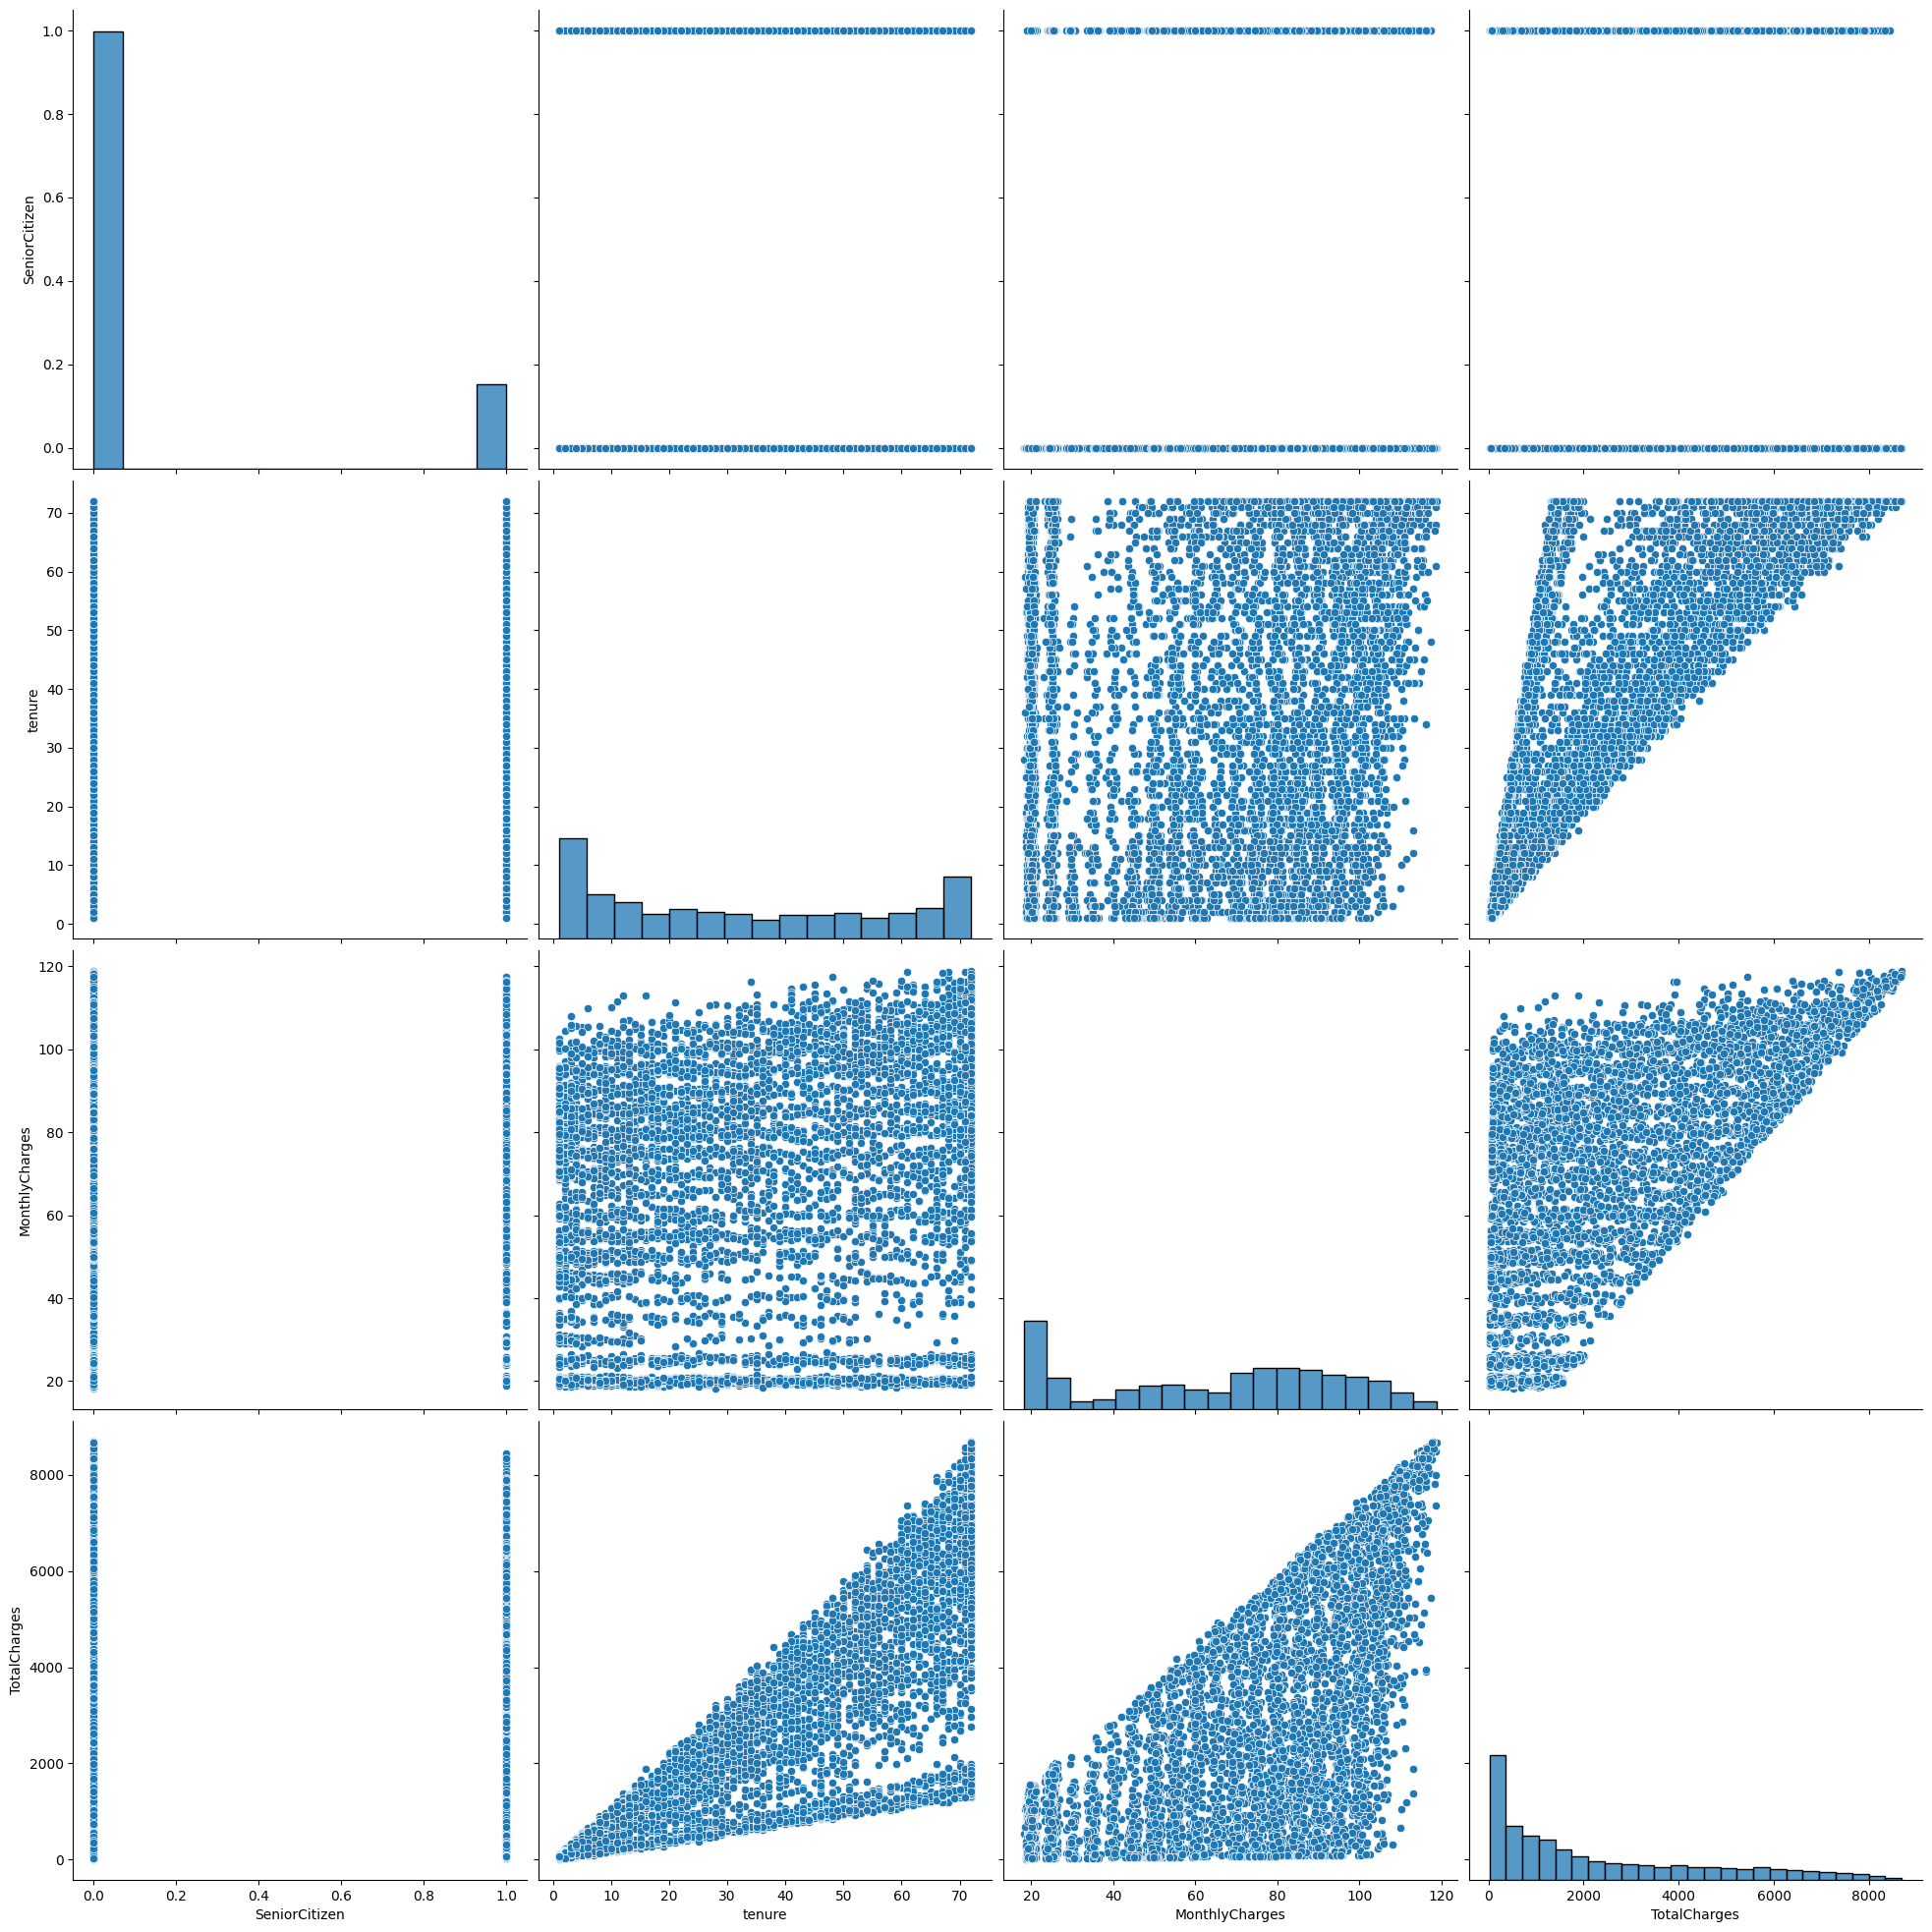

In [43]:
sns.pairplot(df_new ,size=5) 

### **1. Senior Citizen**

We want to compare the Citizen column and how it relates to our target column, i.e; 'Churn' column, see the relationships between the two and examine if we can get more interesting features from the column. 

Determine also if the column will be dropped or not

In [44]:
citizen = df_new[['SeniorCitizen', 'Churn']]

citizen.head()

SeniorCitizen Churn
0              0    No
1              0    No
2              0   Yes
3              0    No
4              0   Yes

In [45]:
citizen.nunique()

SeniorCitizen    2
Churn            2
dtype: int64

In [46]:
Citizen = pd.DataFrame (citizen.value_counts())

Citizen 

0
SeniorCitizen Churn      
0             No     4497
              Yes    1393
1             No      666
              Yes     476

In [47]:
CITIZEN = {
    'SeniorCitizen' : [ 'not a senior citizen', 'not a senior citizen', 'a senior citizen', 'a senior citizen'], 
    'Churn' : ['No', 'Yes', 'No', 'Yes'], 
    'Total' : [4497, 1393, 666, 476]
}

CITIZEN = pd.DataFrame(CITIZEN)

CITIZEN 

SeniorCitizen Churn  Total
0  not a senior citizen    No   4497
1  not a senior citizen   Yes   1393
2      a senior citizen    No    666
3      a senior citizen   Yes    476

In [48]:
citizen.shape

(7032, 2)

(array([[4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [4., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 2., 0., 1., 0., 0., 0., 0., 0., 1.]]),
 array([   0. ,  449.7,  899.4, 1349.1, 1798.8, 2248.5, 2698.2, 3147.9,
        3597.6, 4047.3, 4497. ]),
 <a list of 3 BarContainer objects>)

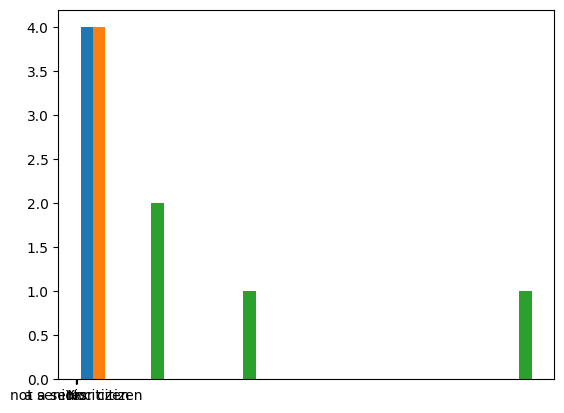

In [49]:
plt.hist(CITIZEN)

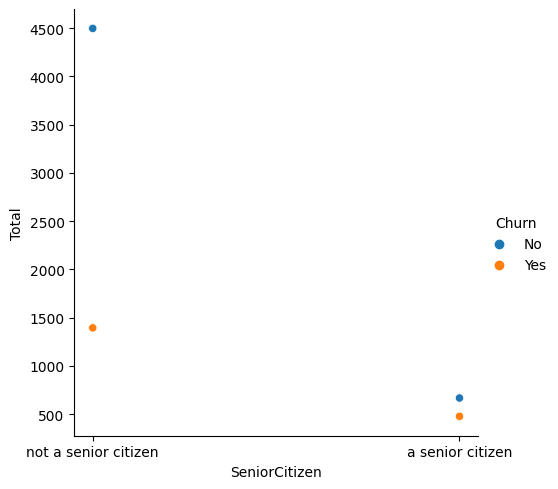

In [50]:
sns.relplot(data=CITIZEN, x="SeniorCitizen", y="Total", hue="Churn")

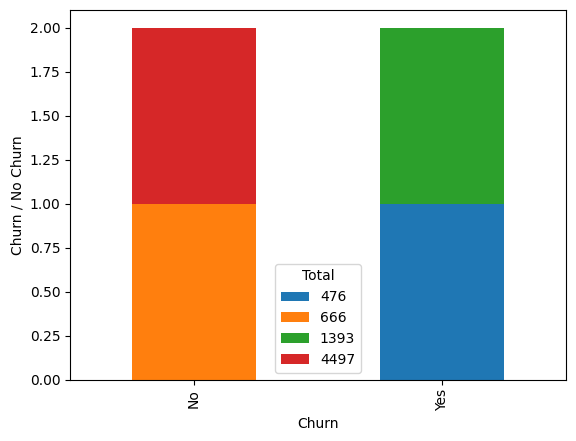

In [51]:
# Create a stacked bar chart of the boolean variable and a categorical variable
#contingency_table = pd.crosstab(CITIZEN['Churn'], CITIZEN['SeniorCitizen'])
contingency_table = pd.crosstab(CITIZEN['Churn'], CITIZEN['Total'])
contingency_table.plot(kind='bar', stacked=True)
#plt.title('Senior citizen churn or Churn not')
plt.ylabel('Churn / No Churn')
plt.show()


In [52]:
CITIZEN['Percentage'] = CITIZEN['Total']*0.014

CITIZEN

SeniorCitizen Churn  Total  Percentage
0  not a senior citizen    No   4497      62.958
1  not a senior citizen   Yes   1393      19.502
2      a senior citizen    No    666       9.324
3      a senior citizen   Yes    476       6.664

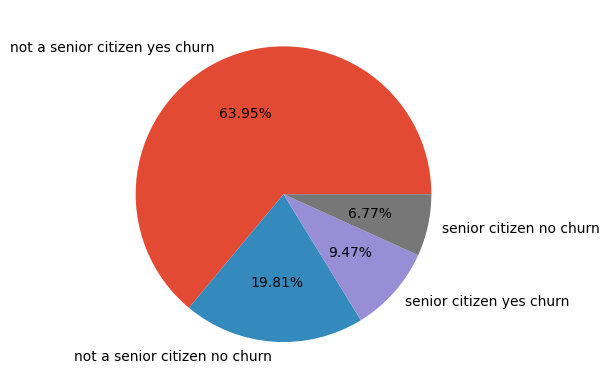

In [53]:
# create a visual for comparison of amount received in disclosed vs undisclosed 
plt.title = ('senior citizen vs non senior citizen')
labels = ['not a senior citizen yes churn','not a senior citizen no churn', 'senior citizen yes churn', 'senior citizen no churn']
amount = [4497 , 1393, 666, 476]
plt.style.use('ggplot')
plt.pie(x = amount, labels= labels , autopct = '%.2f%%' )


plt.show()

In [54]:
df_new.head(0)

Empty DataFrame
Columns: [customerID, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

### **2. PARTNER**

In [55]:
partner = df_new[['Partner', 'Churn']]

partner.head()

Partner Churn
0     Yes    No
1      No    No
2      No   Yes
3      No    No
4      No   Yes

In [56]:
partner['Partner'].value_counts()

No     3639
Yes    3393
Name: Partner, dtype: int64

This column will  be dropped

In [57]:
# Drop the columns 

columns_to_drop = ['Partner']
df_new = df_new.drop(columns=columns_to_drop)

In [58]:
df_new.head()

customerID  SeniorCitizen Dependents  tenure PhoneService  \
0  7590-VHVEG              0         No       1           No   
1  5575-GNVDE              0         No      34          Yes   
2  3668-QPYBK              0         No       2          Yes   
3  7795-CFOCW              0         No      45           No   
4  9237-HQITU              0         No       2          Yes   

      MultipleLines InternetService OnlineSecurity OnlineBackup  \
0  No phone service             DSL             No          Yes   
1                No             DSL            Yes           No   
2                No             DSL            Yes          Yes   
3  No phone service             DSL            Yes           No   
4                No     Fiber optic             No           No   

  DeviceProtection TechSupport StreamingTV        Contract PaperlessBilling  \
0               No          No          No  Month-to-month              Yes   
1              Yes          No          No        One year               No   
2               No          No          No  Month-to-month              Yes   
3              Yes         Yes          No        One year               No   
4               No          No          No  Month-to-month              Yes   

   MonthlyCharges  TotalCharges Churn  
0           29.85         29.85    No  
1           56.95       1889.50    No  
2           53.85        108.15   Yes  
3           42.30       1840.75    No  
4           70.70        151.65   Yes

### **3. Dependents**

In [59]:
df_new['Dependents'].value_counts()

No     4933
Yes    2099
Name: Dependents, dtype: int64

In [60]:
dependents =  df_new[['Dependents', 'Churn']]

dependents.head()

Dependents Churn
0         No    No
1         No    No
2         No   Yes
3         No    No
4         No   Yes

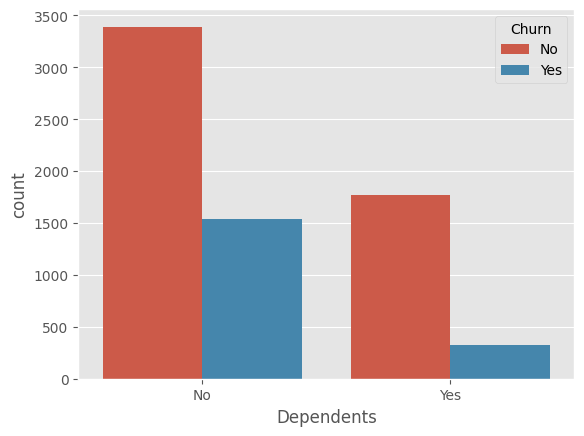

In [61]:
# Create a grouped bar plot
sns.countplot(x='Dependents', hue='Churn', data=dependents)
plt.show()

The dependents averagely affect the number/ ratio of Churn. 
**Case Study 1 - With dependents** 
The ratio of customers with dependents is relatively low as compared to the customers without dependets. 

In this Category, the huge number of customers did not churn 

**Case Study 2 - Without dependents**
Most Customers did not have dependets I.e; Without dependets column accounts for the largest ratio. 

In this Category, the huge number of customers did not churn 

**CONCLUSION**



### **4. tenure**

In [62]:
df_new['tenure'].value_counts()

1     613
72    362
2     238
3     200
4     176
     ... 
38     59
28     57
39     56
44     51
36     50
Name: tenure, Length: 72, dtype: int64

In [63]:
tenure =  df_new[['tenure', 'Churn']]

tenure.head()

tenure Churn
0       1    No
1      34    No
2       2   Yes
3      45    No
4       2   Yes

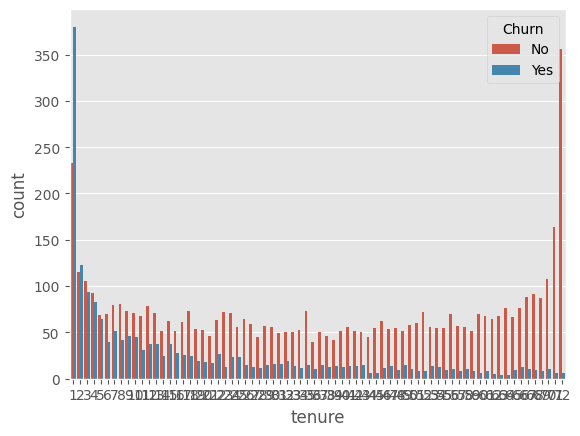

In [64]:
sns.countplot(x='tenure', hue='Churn', data=tenure)
plt.show()

In [65]:
tenure.head(2)

tenure Churn
0       1    No
1      34    No

**Drop this column also though evenly distributed**

In [66]:
# Drop the columns 

columns_to_drop = ['tenure']
df_new = df_new.drop(columns=columns_to_drop)

In [67]:
df_new.head()

customerID  SeniorCitizen Dependents PhoneService     MultipleLines  \
0  7590-VHVEG              0         No           No  No phone service   
1  5575-GNVDE              0         No          Yes                No   
2  3668-QPYBK              0         No          Yes                No   
3  7795-CFOCW              0         No           No  No phone service   
4  9237-HQITU              0         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV        Contract PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No  Month-to-month              Yes           29.85         29.85   
1          No        One year               No           56.95       1889.50   
2          No  Month-to-month              Yes           53.85        108.15   
3          No        One year               No           42.30       1840.75   
4          No  Month-to-month              Yes           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

### **5. PhoneService**

In [68]:
df_new['PhoneService'].value_counts()

Yes    6352
No      680
Name: PhoneService, dtype: int64

In [69]:
df_new[['PhoneService', 'Churn']].head()

PhoneService Churn
0           No    No
1          Yes    No
2          Yes   Yes
3           No    No
4          Yes   Yes

In [70]:
k = df_new[['PhoneService', 'Churn']].value_counts()
k

PhoneService  Churn
Yes           No       4653
              Yes      1699
No            No        510
              Yes       170
dtype: int64

### **6. MultipleLines**

In [71]:
df_new['MultipleLines'].value_counts()

No                  3385
Yes                 2967
No phone service     680
Name: MultipleLines, dtype: int64

In [72]:
df_new[['MultipleLines' , 'Churn']].head()

MultipleLines Churn
0  No phone service    No
1                No    No
2                No   Yes
3  No phone service    No
4                No   Yes

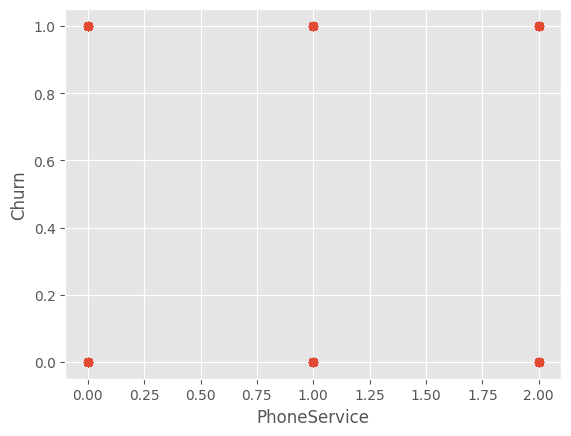

In [73]:
# Assign numeric codes to categorical columns
a = df_new['MultipleLines'].astype('category').cat.codes
b = df_new['Churn'].astype('category').cat.codes

# Create a scatter plot
plt.scatter( a , b )
plt.xlabel('PhoneService')
plt.ylabel('Churn')
#plt.title('Scatter Plot')
plt.show()

**OUR FINAL DATASET WITH 'UNWANTED' COLUMNS DROPPED**

In [74]:
df_new.head()


customerID  SeniorCitizen Dependents PhoneService     MultipleLines  \
0  7590-VHVEG              0         No           No  No phone service   
1  5575-GNVDE              0         No          Yes                No   
2  3668-QPYBK              0         No          Yes                No   
3  7795-CFOCW              0         No           No  No phone service   
4  9237-HQITU              0         No          Yes                No   

  InternetService OnlineSecurity OnlineBackup DeviceProtection TechSupport  \
0             DSL             No          Yes               No          No   
1             DSL            Yes           No              Yes          No   
2             DSL            Yes          Yes               No          No   
3             DSL            Yes           No              Yes         Yes   
4     Fiber optic             No           No               No          No   

  StreamingTV        Contract PaperlessBilling  MonthlyCharges  TotalCharges  \
0          No  Month-to-month              Yes           29.85         29.85   
1          No        One year               No           56.95       1889.50   
2          No  Month-to-month              Yes           53.85        108.15   
3          No        One year               No           42.30       1840.75   
4          No  Month-to-month              Yes           70.70        151.65   

  Churn  
0    No  
1    No  
2   Yes  
3    No  
4   Yes

# **BIVARIATE ANALYSIS**

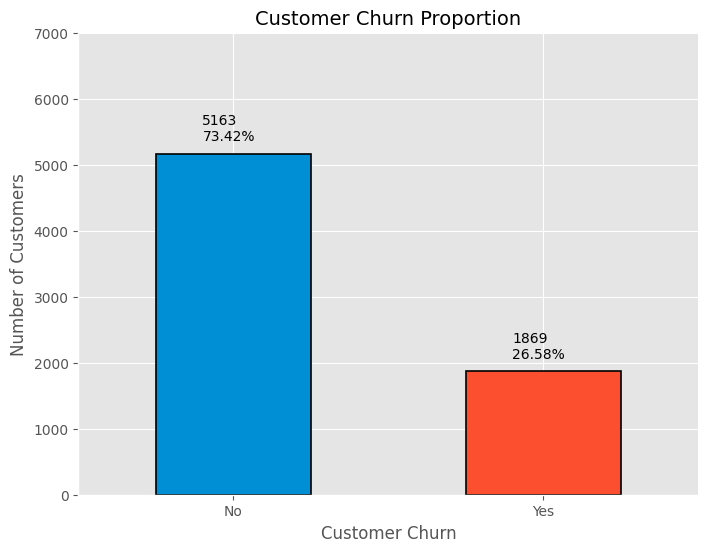

In [75]:
# Plotting the ratio of customer churn

customer_churn_counts = df_new['Churn'].value_counts()
labels = ['No', 'Yes']
colors = ['#008fd5', '#fc4f30']
explode = (0.03, 0.03)

percentages = round(customer_churn_counts/customer_churn_counts.sum()*100, 2).astype(str) + '%'

ax = customer_churn_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Customer Churn Proportion', fontsize=14)
ax.set_xlabel('Customer Churn', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 7000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


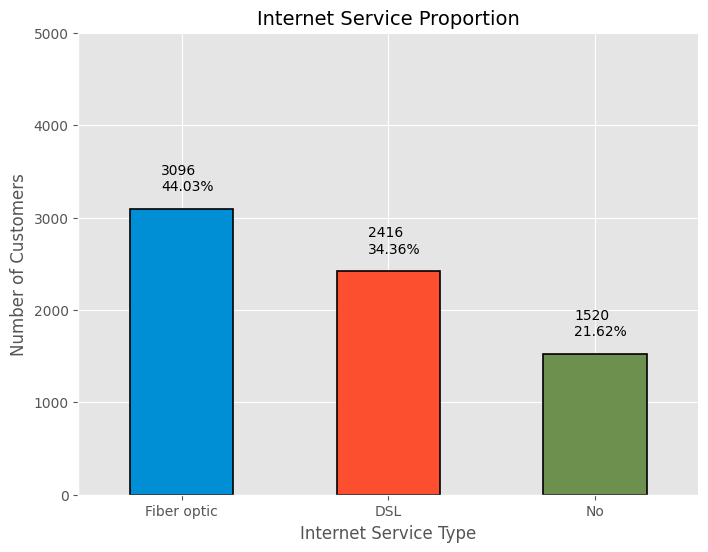

In [76]:
# Plotting the proportion of Internet Service Users

internet_service_counts = df_new['InternetService'].value_counts()
labels = ['DSL', 'Fiber optic', 'No']
colors = ['#008fd5', '#fc4f30','#6d904f']
explode = (0.03, 0.03, 0.1)

percentages = round(internet_service_counts/internet_service_counts.sum()*100, 2).astype(str) + '%'

ax = internet_service_counts.plot(kind='bar', color=colors, edgecolor='black', linewidth=1.2, 
                                  figsize=(8,6), rot=0)
ax.set_title('Internet Service Proportion', fontsize=14)
ax.set_xlabel('Internet Service Type', fontsize=12)
ax.set_ylabel('Number of Customers', fontsize=12)
ax.set_ylim(0, 5000)

for i, p in enumerate(ax.patches):
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy() 
    ax.annotate(f'{height}\n{percentages[i]}', (x + 0.15, y + height + 200))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.show()


**Multiple Lines**

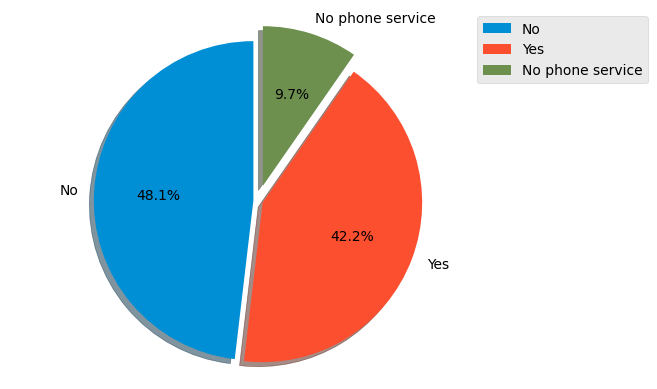

In [77]:
#Plotting the proportion of multiple lines

multiple_lines_counts = df_new['MultipleLines'].value_counts()
labels = ['No', 'Yes', 'No phone service']
colors = ['#008fd5', '#fc4f30', '#6d904f']
explode = (0.03, 0.03, 0.1)
plt.pie(multiple_lines_counts, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
#plt.title('Multiple Lines Proportion')
plt.legend(loc='upper right', bbox_to_anchor=(1.3, 1))
plt.ylabel('')
plt.show()

# MULTIVARIATE ANALYSIS

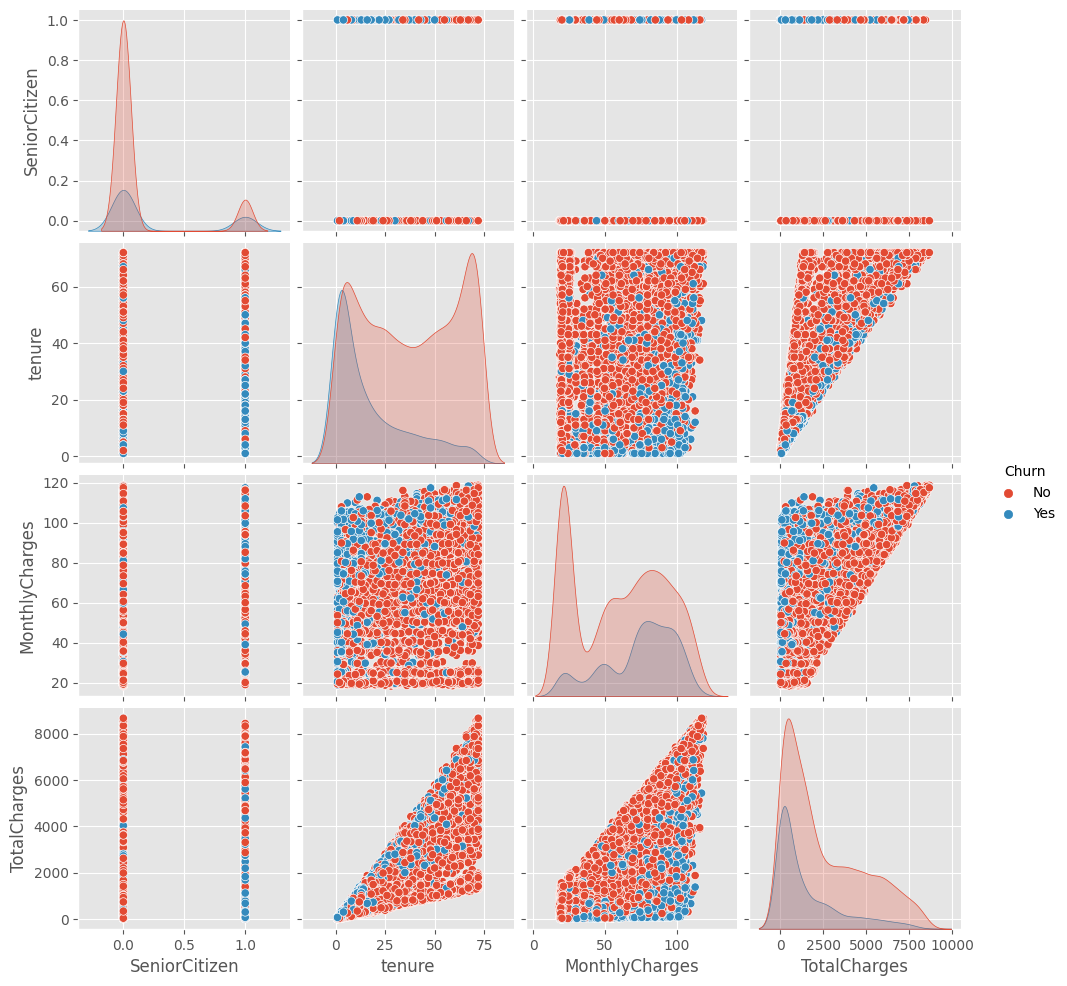

In [78]:
# Select the particular column for comparison
target_column = 'Churn'

# Concatenate the target column with other columns
df_concat = pd.concat([df_new[target_column], df.drop(columns=target_column)], axis=1)

# Create a scatter plot matrix (pair plot)
sns.pairplot(df_concat, hue=target_column)
#plt.title('Pair Plot')
plt.show()

**UNDERSTANDING OF THE BIVARIATE/MULTIVARIATE SNS PLOT**



1.   List item

2.   List item

1.   List item

2.   List item




**QUESTIONS AND ANSWERS**

**_Hypothesis_**

*__Null:__*
_Customers churn as a result of paying  high charges._

*__Alternate:__*
Customers who pay high charges do not churn.


**_Questions_**
1. How much do senior citizens and non-senior citizens pays on a monthly basis?

2. How much is generated from customers with internet service?

3. What is the ratio of customers and their type contracts?

4. What categories of contracts generate the most revenue?

5. Do high paying customers use Stream TV or/and Stream movies?

6. Do non-senior citizens have multiple lines?

7. Do customers with dependents spend more than customers without dependents?

8. What payment methods do customers prefer/use more?

#### **Questions 1**

### **How much do senior citizens and non-senior citizens pays on a monthly basis?**

In [79]:
df_new.head(0)

Empty DataFrame
Columns: [customerID, SeniorCitizen, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [80]:
cit = df_new[['MonthlyCharges', 'SeniorCitizen']]

cit.head()

MonthlyCharges  SeniorCitizen
0           29.85              0
1           56.95              0
2           53.85              0
3           42.30              0
4           70.70              0

In [81]:

charges_churn_yes = cit.loc[cit['SeniorCitizen']=='0']

charges_churn_not = cit.loc[cit['SeniorCitizen']=='1']

charges_churn_not

Empty DataFrame
Columns: [MonthlyCharges, SeniorCitizen]
Index: []

In [82]:
charges_churn_yes.shape , charges_churn_not.shape

((0, 2), (0, 2))

In [83]:
print ('monthly charges for customers that did churn ', charges_churn_yes['MonthlyCharges'].sum())
print ('monthly charges for customers that did not churn ', charges_churn_not['MonthlyCharges'].sum())

monthly charges for customers that did churn  0.0
monthly charges for customers that did not churn  0.0


In [84]:
from plotly import graph_objects as go

In [85]:
# #x = ['senior citizens monthly', 'non senior citizens monthly']
# #y = [charges_churn_yes['MonthlyCharges'].sum(), charges_churn_not['MonthlyCharges'].sum()]



# fig = go.Figure()

# fig.add_trace(go.Funnel(
#     name = 'senior citizen',
#     y = ["senior citizens monthly"],
#     x = [charges_churn_yes['MonthlyCharges'].sum()],
#     textinfo = "value+percent initial"))

# fig.add_trace(go.Funnel(
#     name = 'non senior citizen',
#     orientation = "h",
#     y = ["non senior citizens monthly"],
#     x = [charges_churn_not['MonthlyCharges'].sum()],
#     textposition = "inside",
#     textinfo = "value+percent previous"))

# fig.show()

Get Average

In [86]:
Churn = 316530.15/5163
Churn_not = 139130.85/1869

print (Churn, Churn_not)

61.307408483439865 74.44133226324237


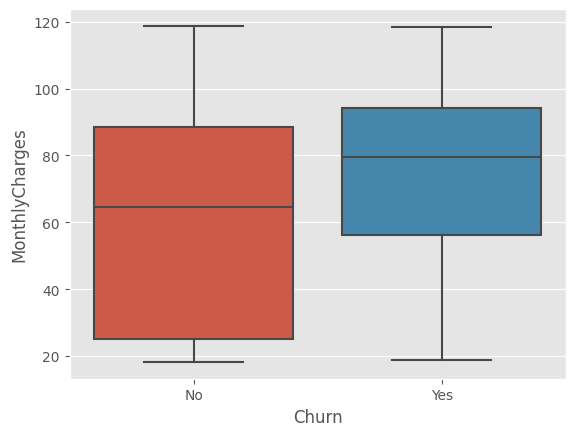

In [87]:
# Create a boxplot of MonthlyCharges by Churn status
sns.boxplot(x='Churn', y='MonthlyCharges', data=df_new)
plt.show()

## **Question 2**

### **2. How much is generated from customers with internet service?  (MONTHLY)**



What payment methods do customers prefer/use more?

In [88]:
df.head(0)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

### **a) Visualize the distribution w.r.t churn**

In [89]:
import warnings
warnings.filterwarnings("ignore")

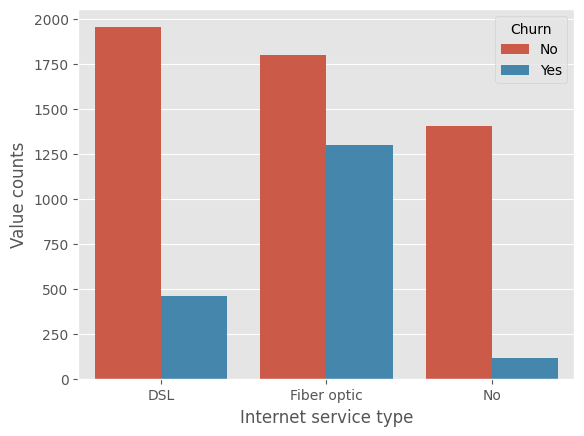

In [90]:
sns.countplot(data = df, x = 'InternetService', hue='Churn')
#plt.title("Internet type VS churn")
plt.xlabel('Internet service type')
plt.ylabel('Value counts')
#plt.title("Internet type VS churn")
plt.show()

**b) Get the monthly charges distribution of each internet service type**

In [91]:
# Getting unique columns with internet services

In [92]:
DSL_charges = df.loc[df['InternetService']=='DSL']
fibre_charges = df.loc[df['InternetService']=='Fiber optic']
no_internet_charges = df.loc[df['InternetService']=='No']

In [93]:
print ( 'DSL internet monthly Charges', DSL_charges['MonthlyCharges'].sum(), '$')
print ( 'Fibre  internet monthly Charges', fibre_charges['MonthlyCharges'].sum(), '$')
print ( 'no internet internet monthly Charges', no_internet_charges['MonthlyCharges'].sum(), '$')

DSL internet monthly Charges 140340.65000000002 $
Fibre  internet monthly Charges 283284.4 $
no internet internet monthly Charges 32035.949999999997 $


In [94]:
# investigate on how to use a for loop for the below code

In [95]:
DSL_charges_churn = DSL_charges.loc[DSL_charges['Churn']=='No']
DSL_charges_churn_not = DSL_charges.loc[DSL_charges['Churn']=='Yes']

fibre_charges_churn = fibre_charges.loc[fibre_charges['Churn']=='No']
fibre_charges_churn_not = fibre_charges.loc[fibre_charges['Churn']=='Yes']


no_internet_charges_churn = no_internet_charges.loc[no_internet_charges['Churn']=='No']
no_internet_charges_churn_not = no_internet_charges.loc[no_internet_charges['Churn']=='Yes']

In [96]:
# pass into a dict then into a df

dict1 = pd.DataFrame ([['DSL churn', DSL_charges_churn['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict2 = pd.DataFrame ([['DSL no churn', DSL_charges_churn_not['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict3 = pd.DataFrame ([['fibre churn', fibre_charges_churn['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict4 = pd.DataFrame ([['fibre no churn', fibre_charges_churn_not['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict5 = pd.DataFrame ([['no_internet_charges_churn', no_internet_charges_churn['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])
dict6 = pd.DataFrame ([['no_internet_charges_churn', no_internet_charges_churn_not['MonthlyCharges'].sum()  ]], columns =['type of internet', 'monthly charges'])

In [97]:
DICT = [dict1, dict2, dict3, dict4, dict5, dict6]

DICT = pd.concat(DICT, ignore_index=True)

DICT

type of internet  monthly charges
0                  DSL churn        117811.45
1               DSL no churn         22529.20
2                fibre churn        168984.35
3             fibre no churn        114300.05
4  no_internet_charges_churn         29734.35
5  no_internet_charges_churn          2301.60

In [98]:
fig = px.funnel(DICT , x='monthly charges', y='type of internet')
fig.show()

### **Question 3**

**3. What is the ratio of customers and their type contracts?**



In [99]:
df.head(0)

Empty DataFrame
Columns: [customerID, gender, SeniorCitizen, Partner, Dependents, tenure, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, StreamingMovies, Contract, PaperlessBilling, PaymentMethod, MonthlyCharges, TotalCharges, Churn]
Index: []

[0 rows x 21 columns]

In [100]:
contract = pd.DataFrame (df[['Contract', 'SeniorCitizen']])



In [101]:
contract_year = contract.loc[contract['Contract'] == 'One year']
contract_month = contract.loc[contract['Contract'] == 'Month-to-month']
contract_2_year = contract.loc[contract['Contract'] == 'Two year']

In [102]:
list1 = [contract_year.value_counts(), contract_month.value_counts(), contract_2_year.value_counts() ]

In [103]:
a = pd.DataFrame(contract_year.value_counts())
b = pd.DataFrame (contract_month.value_counts())
c = pd.DataFrame (contract_2_year.value_counts())

In [104]:
a


0
Contract SeniorCitizen      
One year 0              1282
         1               190

In [105]:
b

0
Contract       SeniorCitizen      
Month-to-month 0              3068
               1               807

In [106]:
c

0
Contract SeniorCitizen      
Two year 0              1540
         1               145

In [107]:
data = {'Contract': ['one year', 'one year', 'month', 'month', '2 year', '2 year'],
        'Senior Citizen': ['yes', 'no','yes', 'no','yes', 'no'],
        'frequency': [190, 1282, 807, 3068, 145, 1540]}
dfpl = pd.DataFrame(data)
dfpl

Contract Senior Citizen  frequency
0  one year            yes        190
1  one year             no       1282
2     month            yes        807
3     month             no       3068
4    2 year            yes        145
5    2 year             no       1540

In [108]:
fig = px.bar( dfpl, x = 'Senior Citizen', y = 'frequency', color='Contract', barmode = 'group')

fig.show()

### **Question 4**

**4. What categories of contracts generate the most revenue?**



In [109]:
df.head(2)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   
1  5575-GNVDE    Male              0      No         No      34          Yes   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   
1                No             DSL            Yes  ...              Yes   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   
1          No          No              No        One year               No   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  
1      Mailed check          56.95       1889.50     No  

[2 rows x 21 columns]

In [110]:
contract_year = df.loc[df['Contract'] == 'One year']
contract_month = df.loc[df['Contract'] == 'Month-to-month']
contract_2_year = df.loc[df['Contract'] == 'Two year']

In [111]:
print ( 'yearly contract sum', contract_year['MonthlyCharges'].sum())
print ( 'monthly contract sum', contract_month['MonthlyCharges'].sum())
print( '2 yearly contract sum', contract_2_year['MonthlyCharges'].sum())

yearly contract sum 95796.9
monthly contract sum 257294.15000000002
2 yearly contract sum 102569.95


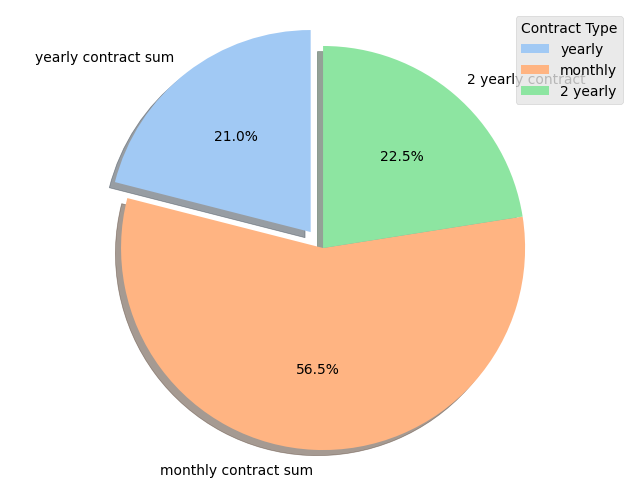

In [112]:
x = ['yearly', 'monthly', '2 yearly']
y = [95796, 257294, 102569]
labels = ['yearly contract sum', 'monthly contract sum', '2 yearly contract']

# Create pie chart
plt.figure(figsize=(8, 6))
explode = (0.1, 0, 0)  # Explode the first slice

# Create pie chart with custom colors and explode
colors = sns.color_palette('pastel')[0:len(x)]
plt.pie(y, labels=labels, autopct='%1.1f%%', startangle=90, colors=colors, explode=explode, shadow=True)

# Add title and legend
#plt.title('Contract Sums percentage of total')
plt.legend(x, title='Contract Type', loc='upper right')

# Set aspect ratio to be equal so that pie is drawn as a circle
plt.axis('equal')

# Show the plot
plt.show()

### **Question 5**

**5. Do customers with dependents spend more than customers without dependents?**



In [113]:
df.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  

[1 rows x 21 columns]

In [114]:
df['Dependents'].unique()

array(['No', 'Yes'], dtype=object)

In [115]:
depend = df.loc[df['Dependents']== 'No']
depend_not = df.loc[df['Dependents']== 'Yes']

print ( 'monthly charges without dependent' , depend['MonthlyCharges'].sum())
print ( 'monthly charges with dependent' ,depend_not['MonthlyCharges'].sum())

monthly charges without dependent 330524.85
monthly charges with dependent 125136.15


<BarContainer object of 2 artists>

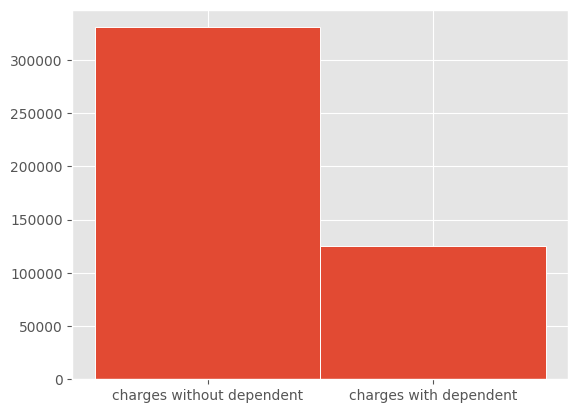

In [116]:
x = [depend['MonthlyCharges'].sum(), depend_not['MonthlyCharges'].sum()]
y = ['charges without dependent', 'charges with dependent']

fig, ax = plt.subplots()

ax.bar(y, x, width=1, edgecolor="white", linewidth=0.7)

Examine the churn ratio

In [117]:
df['Churn'].unique()

array(['No', 'Yes'], dtype=object)

In [118]:
depend.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  

[1 rows x 21 columns]

In [119]:
# Get unique column
depend_yes_churn = depend.loc[depend['Churn'] == 'Yes']
depend_no_churn = depend.loc[depend['Churn'] == 'No']

not_depend_yes_churn = depend_not.loc[depend_not['Churn'] == 'Yes']
not_depend_no_churn = depend_not.loc[depend_not['Churn'] == 'No']

# Get the summation of the amount 
a = depend_yes_churn['MonthlyCharges'].sum()
b = depend_no_churn['MonthlyCharges'].sum()
c = not_depend_yes_churn['MonthlyCharges'].sum()
d = not_depend_no_churn['MonthlyCharges'].sum()

# Get percentage of total monthly charges 
e = a + b +c +d

f = (a/e) * 100
g = (b/e) * 100
h = (c/e) * 100
i = (d/e) * 100



In [120]:
from plotly import graph_objects as go

fig = go.Figure()

fig.add_trace(go.Funnel(
    name = 'Has dependent and churned',
    y = ["Monthly amount", "Percentage"],
    x = [ a , f,],
    textinfo = "value+percent initial"))

fig.add_trace(go.Funnel(
    name = 'Has dependent did not churn',
    orientation = "h",
    y = ["Monthly amount", "Percentage"],
    x = [b, g],
    textposition = "inside",
    textinfo = "value+percent previous"))

fig.add_trace(go.Funnel(
    name = 'No dependent and churned',
    orientation = "h",
    y = ["Monthly amount", "Percentage"],
    x = [c , h],
    textposition = "outside",
    textinfo = "value+percent total"))

fig.add_trace(go.Funnel(
    name = 'No dependent and did churned',
    orientation = "h",
    y = ["Monthly amount", "Percentage"],
    x = [d , i],
    textposition = "outside",
    textinfo = "value+percent total"))

fig.show()


### **Question 6**

**6. What payment methods do customers prefer/use more?**

In [121]:
df.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges  Churn  
0  Electronic check          29.85         29.85     No  

[1 rows x 21 columns]

In [122]:
df_.head(1)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  7590-VHVEG  Female              0     Yes         No       1           No   

      MultipleLines InternetService OnlineSecurity  ... DeviceProtection  \
0  No phone service             DSL             No  ...               No   

  TechSupport StreamingTV StreamingMovies        Contract PaperlessBilling  \
0          No          No              No  Month-to-month              Yes   

      PaymentMethod MonthlyCharges  TotalCharges Churn  
0  Electronic check          29.85         29.85    No  

[1 rows x 21 columns]

In [123]:
df_['PaymentMethod'].value_counts()

Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64

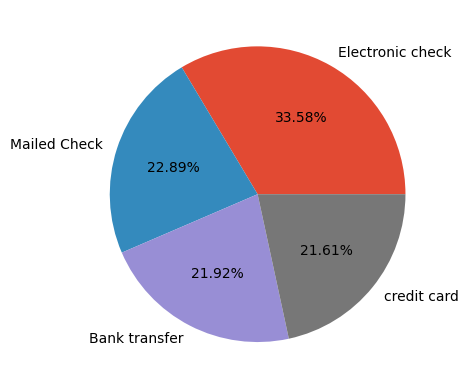

In [124]:
x = [2365, 1612, 1544, 1522]
y = ['Electronic check', 'Mailed Check', 'Bank transfer', 'credit card']


plt.title = ('Payment methods preferences')
labels = y
amount = x
plt.style.use('ggplot')
plt.pie(x = amount, labels= labels , autopct = '%.2f%%' )


plt.show()

# **FEATURE ENGINEERING**

In [125]:
df_.describe()

SeniorCitizen       tenure  MonthlyCharges
count    7043.000000  7043.000000     7043.000000
mean        0.162147    32.371149       64.761692
std         0.368612    24.559481       30.090047
min         0.000000     0.000000       18.250000
25%         0.000000     9.000000       35.500000
50%         0.000000    29.000000       70.350000
75%         0.000000    55.000000       89.850000
max         1.000000    72.000000      118.750000

**Numerical Features** - We **scale** the numerical columns



*   Avoiding attribute dominance/Outliers handling

*   


**Categorical Features** - We perform a **Encoding** I.e label encoding of OneHotEncoding to this columns


*   List item

*   List item
*   List item


*   List item



### **GET THE NUMERICAL AND CATEGORICAL FEATURES**

In [126]:
df_new.head(0)

Empty DataFrame
Columns: [customerID, SeniorCitizen, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [127]:
#Further  Drop CustomerID not to be used in modelling 

df_new_ = df_new.drop('customerID', axis=1)

df_new_.head(0)

Empty DataFrame
Columns: [SeniorCitizen, Dependents, PhoneService, MultipleLines, InternetService, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, Contract, PaperlessBilling, MonthlyCharges, TotalCharges, Churn]
Index: []

In [128]:
# Get the original column names and store in a variables

original_columns = df_new_.columns.tolist()

original_columns


['SeniorCitizen',
 'Dependents',
 'PhoneService',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'Contract',
 'PaperlessBilling',
 'MonthlyCharges',
 'TotalCharges',
 'Churn']

In [129]:
df_new_.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   SeniorCitizen     7032 non-null   int64  
 1   Dependents        7032 non-null   object 
 2   PhoneService      7032 non-null   object 
 3   MultipleLines     7032 non-null   object 
 4   InternetService   7032 non-null   object 
 5   OnlineSecurity    7032 non-null   object 
 6   OnlineBackup      7032 non-null   object 
 7   DeviceProtection  7032 non-null   object 
 8   TechSupport       7032 non-null   object 
 9   StreamingTV       7032 non-null   object 
 10  Contract          7032 non-null   object 
 11  PaperlessBilling  7032 non-null   object 
 12  MonthlyCharges    7032 non-null   float64
 13  TotalCharges      7032 non-null   float64
 14  Churn             7032 non-null   object 
dtypes: float64(2), int64(1), object(12)
memory usage: 1.1+ MB


In [130]:
# Get the list of all the columns 
column_list = list(df_new_.columns)



In [131]:
# Numerical columns 

#numeric_cols = df_new_[column_list].select_dtypes(include=np.number).columns.tolist()

numeric_cols = pd.DataFrame (df_new_[column_list].select_dtypes(include=np.number).columns.tolist())

numeric_cols.head()

0
0   SeniorCitizen
1  MonthlyCharges
2    TotalCharges

In [132]:
# Categorical columns

#categorical_cols =df_new_[column_list].select_dtypes(exclude=np.number).columns.tolist()

categorical_cols = pd.DataFrame (df_new_[column_list].select_dtypes(exclude=np.number).columns.tolist())

categorical_cols.head()

0
0       Dependents
1     PhoneService
2    MultipleLines
3  InternetService
4   OnlineSecurity

**a) Scale Numerical features**

In [133]:
from sklearn.preprocessing import StandardScaler

# Create an instance of that class
scaler = StandardScaler()

In [134]:
numeric_cols.T

0               1             2
0  SeniorCitizen  MonthlyCharges  TotalCharges

In [135]:
num_cols = [ 'SeniorCitizen' , 'MonthlyCharges', 'TotalCharges']

In [136]:
df_ready = df_new_[num_cols]

df_ready.head()

SeniorCitizen  MonthlyCharges  TotalCharges
0              0           29.85         29.85
1              0           56.95       1889.50
2              0           53.85        108.15
3              0           42.30       1840.75
4              0           70.70        151.65

In [137]:
df_ready.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SeniorCitizen   7032 non-null   int64  
 1   MonthlyCharges  7032 non-null   float64
 2   TotalCharges    7032 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 477.8 KB


In [138]:
import warnings
warnings.filterwarnings("ignore")

In [139]:
df_ready_ = scaler.fit_transform(df_ready)

df_ready_

array([[-0.44032709, -1.16169394, -0.99419409],
       [-0.44032709, -0.26087792, -0.17373982],
       [-0.44032709, -0.36392329, -0.95964911],
       ...,
       [-0.44032709, -1.17000405, -0.85451414],
       [ 2.27103902,  0.31916782, -0.87209546],
       [-0.44032709,  1.35793167,  2.01234407]])

In [140]:
# Get a copy of the scaled numeric data

scaled_numeric = df_ready_.copy()

In [141]:
pd.DataFrame(df_ready_).head()

0         1         2
0 -0.440327 -1.161694 -0.994194
1 -0.440327 -0.260878 -0.173740
2 -0.440327 -0.363923 -0.959649
3 -0.440327 -0.747850 -0.195248
4 -0.440327  0.196178 -0.940457

In [142]:
#df_new_ = scaler.fit_transform(num_cols)

#df_new_ ['numeric_cols']= pd.DataFrame(scaler.fit_transform(numeric_cols), columns=numeric_cols.columns)

**b) Encoding categoricaal cols**

In [143]:
from sklearn.preprocessing import OneHotEncoder

In [144]:
encoder = OneHotEncoder(sparse=False)

In [145]:
categorical_cols.T

0             1              2                3               4   \
0  Dependents  PhoneService  MultipleLines  InternetService  OnlineSecurity   

             5                 6            7            8         9   \
0  OnlineBackup  DeviceProtection  TechSupport  StreamingTV  Contract   

                 10     11  
0  PaperlessBilling  Churn

In [146]:
cat_cals = ['Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'Contract', 'PaperlessBilling']

In [147]:
# 'Drop' churn column

In [148]:
df_encoded = pd.DataFrame(encoder.fit_transform(df_new_[cat_cals]))

#df_encoded = encoder.get_feature_names(cat_cals)

df_encoded.head()
                                                


0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  1.0  0.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   

    24   25   26   27   28   29  
0  0.0  1.0  0.0  0.0  0.0  1.0  
1  0.0  0.0  1.0  0.0  1.0  0.0  
2  0.0  1.0  0.0  0.0  0.0  1.0  
3  0.0  0.0  1.0  0.0  1.0  0.0  
4  0.0  1.0  0.0  0.0  0.0  1.0  

[5 rows x 30 columns]

In [149]:
# Create a copy 

encoded_categorical = df_encoded.copy()

**c) Replace categorical data with encoded team**

In [150]:
# 
df_ready_ = pd.DataFrame (df_ready_)

In [151]:
df_ready_.head()

0         1         2
0 -0.440327 -1.161694 -0.994194
1 -0.440327 -0.260878 -0.173740
2 -0.440327 -0.363923 -0.959649
3 -0.440327 -0.747850 -0.195248
4 -0.440327  0.196178 -0.940457

In [152]:
# Drop the categorical columns 
df_ready_ =df_ready_.drop(categorical_cols, axis = 1)

a = pd.DataFrame (encoded_categorical)
b = pd.DataFrame (scaled_numeric)

# Replace the dropped cat columns with the encoded cat columns
df_ready_ = pd.concat([a, b], axis=1)

In [153]:
a.shape, b.shape, df_new.shape

((7032, 30), (7032, 3), (7032, 16))

### **c) Encode our Target Feature (Manually)**

In [154]:
!pip install category_encoders


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 3.2 MB/s eta 0:00:00


In [155]:
#import label encoder 

from sklearn.preprocessing import LabelEncoder

In [156]:
df_new['Churn']

0        No
1        No
2       Yes
3        No
4       Yes
       ... 
7038     No
7039     No
7040     No
7041    Yes
7042     No
Name: Churn, Length: 7032, dtype: object

In [157]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

target = df_new['Churn'].values.reshape(-1, 1)
target_encoded = le.fit_transform(target)

target_encoded

array([0, 0, 1, ..., 0, 1, 0])

In [158]:
churn = target_encoded.copy()

In [159]:
pd.DataFrame(churn).head()

0
0  0
1  0
2  1
3  0
4  1

### **COMBINED DATASET** 

In [160]:
df_ready_ = pd.concat([a, b, pd.DataFrame(churn, columns=['churn'])], axis=1)

df_ready_

0    1    2    3    4    5    6    7    8    9  ...   24   25   26  \
0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
1     1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
2     1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
3     1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
4     1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7027  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   
7028  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0  1.0   
7029  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
7030  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
7031  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   

       27   28   29         0         1         2  churn  
0     0.0  0.0  1.0 -0.440327 -1.161694 -0.994194      0  
1     0.0  1.0  0.0 -0.440327 -0.260878 -0.173740      0  
2     0.0  0.0  1.0 -0.440327 -0.363923 -0.959649      1  
3     0.0  1.0  0.0 -0.440327 -0.747850 -0.195248      0  
4     0.0  0.0  1.0 -0.440327  0.196178 -0.940457      1  
...   ...  ...  ...       ...       ...       ...    ...  
7027  0.0  0.0  1.0 -0.440327  0.664868 -0.129180      0  
7028  0.0  0.0  1.0 -0.440327  1.276493  2.241056      0  
7029  0.0  0.0  1.0 -0.440327 -1.170004 -0.854514      0  
7030  0.0  0.0  1.0  2.271039  0.319168 -0.872095      1  
7031  1.0  0.0  1.0 -0.440327  1.357932  2.012344      0  

[7032 rows x 34 columns]

In [161]:
df_ready_.isna().sum()

0        0
1        0
2        0
3        0
4        0
5        0
6        0
7        0
8        0
9        0
10       0
11       0
12       0
13       0
14       0
15       0
16       0
17       0
18       0
19       0
20       0
21       0
22       0
23       0
24       0
25       0
26       0
27       0
28       0
29       0
0        0
1        0
2        0
churn    0
dtype: int64

In [162]:
df_ready_

0    1    2    3    4    5    6    7    8    9  ...   24   25   26  \
0     1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
1     1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
2     1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
3     1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0   
4     1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
...   ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   
7027  0.0  1.0  0.0  1.0  0.0  0.0  1.0  1.0  0.0  0.0  ...  1.0  0.0  1.0   
7028  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  1.0  0.0  1.0   
7029  0.0  1.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  1.0  0.0   
7030  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  0.0   
7031  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  1.0  0.0  0.0   

       27   28   29         0         1         2  churn  
0     0.0  0.0  1.0 -0.440327 -1.161694 -0.994194      0  
1     0.0  1.0  0.0 -0.440327 -0.260878 -0.173740      0  
2     0.0  0.0  1.0 -0.440327 -0.363923 -0.959649      1  
3     0.0  1.0  0.0 -0.440327 -0.747850 -0.195248      0  
4     0.0  0.0  1.0 -0.440327  0.196178 -0.940457      1  
...   ...  ...  ...       ...       ...       ...    ...  
7027  0.0  0.0  1.0 -0.440327  0.664868 -0.129180      0  
7028  0.0  0.0  1.0 -0.440327  1.276493  2.241056      0  
7029  0.0  0.0  1.0 -0.440327 -1.170004 -0.854514      0  
7030  0.0  0.0  1.0  2.271039  0.319168 -0.872095      1  
7031  1.0  0.0  1.0 -0.440327  1.357932  2.012344      0  

[7032 rows x 34 columns]

## **DATA SPLITTING**

In [163]:
from sklearn.model_selection import train_test_split

In [164]:
X = df_ready_.drop(['churn'], axis=1)  # these are the features to learn from 

y = df_ready_['churn'] # these is our target feature 

In [165]:
# See tyhe features 

X.head()

0    1    2    3    4    5    6    7    8    9   ...   23   24   25   26  \
0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
1  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
2  1.0  0.0  0.0  1.0  1.0  0.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  1.0  0.0   
3  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  0.0  ...  0.0  0.0  0.0  1.0   
4  1.0  0.0  0.0  1.0  1.0  0.0  0.0  0.0  1.0  0.0  ...  0.0  0.0  1.0  0.0   

    27   28   29        0         1         2   
0  0.0  0.0  1.0 -0.440327 -1.161694 -0.994194  
1  0.0  1.0  0.0 -0.440327 -0.260878 -0.173740  
2  0.0  0.0  1.0 -0.440327 -0.363923 -0.959649  
3  0.0  1.0  0.0 -0.440327 -0.747850 -0.195248  
4  0.0  0.0  1.0 -0.440327  0.196178 -0.940457  

[5 rows x 33 columns]

In [166]:
# See the target

y.head()

0    0
1    0
2    1
3    0
4    1
Name: churn, dtype: int64

**It is important to note that after scaling / encoding our features before splitting then our target (y) and features (x) are already encoded** 

In [167]:
# Splitting our dataset with a ratio of 80:20

X_train, X_eval, y_train, y_eval = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y) # stratify specified to y

In [168]:
X_train.shape, X_eval.shape,  y_train.shape , y_eval.shape

((5625, 33), (1407, 33), (5625,), (1407,))

In [169]:
X_train.head(2)

0    1    2    3    4    5    6    7    8    9   ...   23   24   25  \
3780  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   
1588  0.0  1.0  0.0  1.0  1.0  0.0  0.0  0.0  0.0  1.0  ...  1.0  0.0  1.0   

       26   27   28   29        0         1         2   
3780  0.0  0.0  0.0  1.0 -0.440327  0.364042 -0.156313  
1588  0.0  0.0  1.0  0.0 -0.440327 -1.527339 -0.970216  

[2 rows x 33 columns]

In [170]:
X_eval.head(2)

0    1    2    3    4    5    6    7    8    9   ...   23   24   25  \
5126  1.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  0.0  1.0   
2423  0.0  1.0  0.0  1.0  0.0  0.0  1.0  0.0  1.0  0.0  ...  0.0  1.0  1.0   

       26   27   28   29        0         1         2   
5126  0.0  0.0  0.0  1.0  2.271039  0.511962 -0.470328  
2423  0.0  0.0  0.0  1.0 -0.440327  1.145193  0.659068  

[2 rows x 33 columns]

In [171]:
y_train[:5]

3780    0
1588    0
2927    0
198     0
4504    0
Name: churn, dtype: int64

# **MODEL BUILDING AND MODEL SELECTION**

**MODELS TO TEST BEFORE SELECTION**

1. Random Forest
2. Gradient Boosting (e.g., XGBoost, LightGBM)
3. Logistic Regression
4. Support Vector Machines (SVM)
5. Neural Networks (e.g., Multi-layer Perceptron)
6. K-Nearest Neighbors (KNN)
7. Decision Trees
8. Naive Bayes
9. AdaBoost
10. Gaussian Processes

### **MODEL 1 - RANDOM FOREST**

In [172]:
from sklearn.ensemble import RandomForestClassifier

Create an instance and set the number of estimators to be 100

In [173]:
# Create the Random Forest classifier instance with 100 estimators 

model1 = RandomForestClassifier(n_estimators=100, random_state=42)



Train Model 

In [174]:
# Train the classifier on the training data
model1.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Make predictions

In [175]:
# Use the trained classifier to make predictions on the test data
y_pred = model1.predict(X_eval)


Evaluating the model 

In [176]:
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [177]:
# Calculate the accuracy of the model

acc = metrics.accuracy_score(y_eval, y_pred)
prec = metrics.precision_score(y_eval, y_pred, average='micro')
rec = metrics.recall_score(y_eval, y_pred, average='micro')
f1 = metrics.f1_score(y_eval, y_pred,average='micro')


In [178]:
print ('accuracy :', acc)
print ('precision :', prec)
print ('rec :', rec)
print ('f1 :', f1)



accuracy : 0.7789623312011372
precision : 0.7789623312011372
rec : 0.7789623312011372
f1 : 0.7789623312011372


In [179]:

# Print the classification Report 

print ( metrics.classification_report (y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.89      0.86      1033
           1       0.61      0.46      0.53       374

    accuracy                           0.78      1407
   macro avg       0.72      0.68      0.69      1407
weighted avg       0.77      0.78      0.77      1407



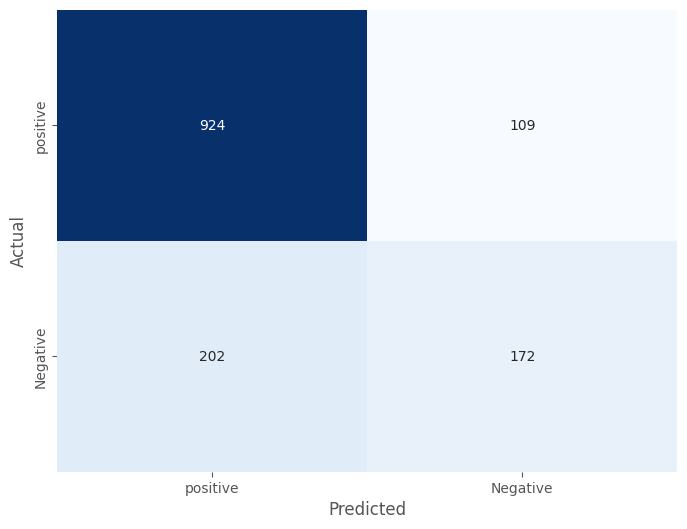

In [180]:
# visualize the metrics 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_eval, y_pred)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [181]:
metrics1 = pd.DataFrame( [['Random Forest', acc,prec, rec, f1 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

In [182]:
metrics1

Model  accuracy  precision     recal        f1
0  Random Forest  0.778962   0.778962  0.778962  0.778962

# **MODEL 2 : GRADIENT BOOSTING**

In [183]:
from sklearn.ensemble import GradientBoostingClassifier

Create an instance , set 100 estimators

In [184]:
gb = GradientBoostingClassifier(n_estimators=100, random_state=42)

**Train our GB**

In [185]:
gb.fit(X_train, y_train)

GradientBoostingClassifier(random_state=42)

**Make Predictions using the GBoost**

In [186]:
y_pred = gb.predict(X_eval)

In [187]:
y_pred =pd.DataFrame( y_pred)

y_pred.head(2)

0
0  1
1  0

**Evaluate the predictions made**

In [188]:
y_pred.shape

(1407, 1)

In [189]:
y_pred.head(2)

0
0  1
1  0

In [190]:
# Calculate the accuracy of the model

acc2 = metrics.accuracy_score(y_eval, y_pred)
prec2 = metrics.precision_score(y_eval, y_pred, average='micro')
rec2 = metrics.recall_score(y_eval, y_pred, average='micro')
f12 = metrics.f1_score(y_eval, y_pred,average='micro')


In [191]:
print ('accuracy model 2 :', acc2)
print ('precision model 2:', prec2)
print ('rec model 2:', rec2)
print ('f1 model 2:', f12)



accuracy model 2 : 0.8052594171997157
precision model 2: 0.8052594171997157
rec model 2: 0.8052594171997157
f1 model 2: 0.8052594171997157


In [192]:

# Print the classification Report 

print ( metrics.classification_report (y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.68      0.51      0.58       374

    accuracy                           0.81      1407
   macro avg       0.76      0.71      0.73      1407
weighted avg       0.79      0.81      0.80      1407



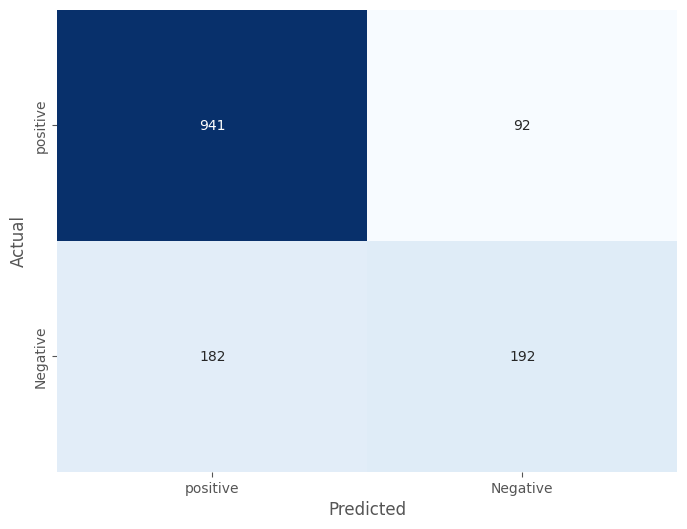

In [193]:
# visualize the metrics 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_eval, y_pred)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [194]:
metrics2 = pd.DataFrame( [['Gradient Boosting', acc2,prec2, rec2, f12 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

In [195]:
metrics3 = metrics2.append(metrics1, ignore_index = True )

metrics3

Model  accuracy  precision     recal        f1
0  Gradient Boosting  0.805259   0.805259  0.805259  0.805259
1      Random Forest  0.778962   0.778962  0.778962  0.778962

In [196]:

# Print the classification Report 

# print ( metrics.classification_report (y_eval, y_pred))

## **MODEL 3 : DECISON TREES**

In [197]:
from sklearn.tree import DecisionTreeClassifier

In [198]:
# Create an instane of the classifier 

classifier = DecisionTreeClassifier(random_state=42)

**Train/fit our data**

In [199]:
classifier.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

**Make Predictions**

In [200]:
y_pred = classifier.predict(X_eval)

In [201]:
pd.DataFrame(y_pred).head(2)

0
0  0
1  0

**Evaluate the model**

In [202]:
acc3 = metrics.accuracy_score(y_eval, y_pred)
prec3 = metrics.precision_score(y_eval, y_pred, average='micro')
rec3 = metrics.recall_score(y_eval, y_pred, average='micro')
f13 = metrics.f1_score(y_eval, y_pred,average='micro')




In [203]:
print ('accuracy for model 3:', acc3)
print ('precision for model 3 :', prec3)
print ('rec for model 3:', rec3)
print ('f1 for model 3:', f13)



accuracy for model 3: 0.7391613361762616
precision for model 3 : 0.7391613361762616
rec for model 3: 0.7391613361762616
f1 for model 3: 0.7391613361762616


In [204]:
# Classification Report

print ( metrics.classification_report(y_eval,y_pred))

              precision    recall  f1-score   support

           0       0.82      0.82      0.82      1033
           1       0.51      0.51      0.51       374

    accuracy                           0.74      1407
   macro avg       0.67      0.66      0.67      1407
weighted avg       0.74      0.74      0.74      1407



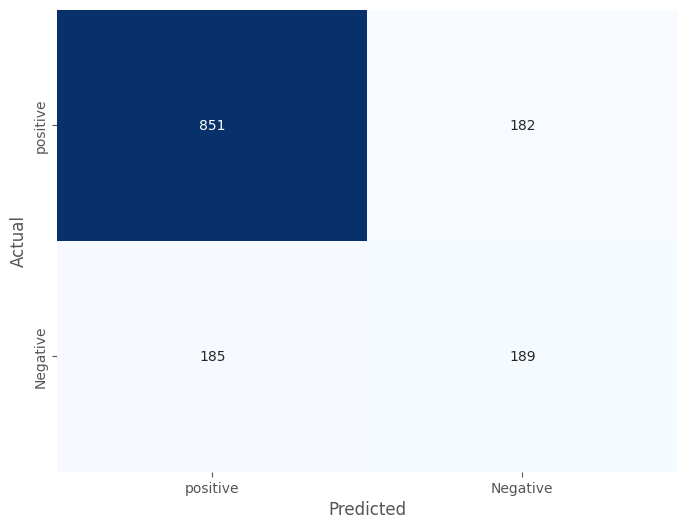

In [205]:
# Visualizing the metrics 

# visualize the metrics 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_eval, y_pred)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )


plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [206]:
metrics4 = pd.DataFrame( [['Decision Tree', acc3 ,prec3, rec3, f13 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

metrics4

Model  accuracy  precision     recal        f1
0  Decision Tree  0.739161   0.739161  0.739161  0.739161

In [207]:
metrics5 = metrics4.append(metrics3)

metrics5

Model  accuracy  precision     recal        f1
0      Decision Tree  0.739161   0.739161  0.739161  0.739161
0  Gradient Boosting  0.805259   0.805259  0.805259  0.805259
1      Random Forest  0.778962   0.778962  0.778962  0.778962

## **MODEL 4 : K MEANS**

In [208]:
from sklearn.neighbors import KNeighborsClassifier

In [209]:
# Create the KNN classifier
knn  = KNeighborsClassifier(n_neighbors=5)

**Train the classifier**

In [210]:
# Train the classifier on the training data

knn.fit(X_train, y_train)

KNeighborsClassifier()

**Make Predictions**

In [211]:
# Use the trained classifier to make predictions on the test data
y_pred = knn.predict(X_eval)


Exception ignored on calling ctypes callback function: <function ThreadpoolController._find_libraries_with_dl_iterate_phdr.<locals>.match_library_callback at 0x7f22838079a0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 584, in match_library_callback
    self._make_controller_from_path(filepath)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 725, in _make_controller_from_path
    lib_controller = lib_controller_class(
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 842, in __init__
    super().__init__(**kwargs)
  File "/usr/local/lib/python3.10/dist-packages/threadpoolctl.py", line 810, in __init__
    self._dynlib = ctypes.CDLL(filepath, mode=_RTLD_NOLOAD)
  File "/usr/lib/python3.10/ctypes/__init__.py", line 374, in __init__
    self._handle = _dlopen(self._name, mode)
OSError: dlopen() error


In [212]:
pd.DataFrame(y_pred).head(2)

0
0  1
1  0

**Evaluate the model**

In [213]:
acc4 = metrics.accuracy_score(y_eval, y_pred)
prec4 = metrics.precision_score(y_eval, y_pred, average='micro')
rec4 = metrics.recall_score(y_eval, y_pred, average='micro')
f14 = metrics.f1_score(y_eval, y_pred,average='micro')

In [214]:

print ('accuracy model 4 :', acc4)
print ('precision model 4 :', prec4)
print ('rec model 4 :', rec4)
print ('f1 model 4  :', f14)

accuracy model 4 : 0.775408670931059
precision model 4 : 0.775408670931059
rec model 4 : 0.775408670931059
f1 model 4  : 0.775408670931059


In [215]:
print (metrics.classification_report(y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.88      0.85      1033
           1       0.59      0.49      0.54       374

    accuracy                           0.78      1407
   macro avg       0.71      0.68      0.69      1407
weighted avg       0.76      0.78      0.77      1407



In [216]:
metrics6 = pd.DataFrame( [['K Means', acc4 ,prec4, rec4, f14 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

In [217]:
metrics7 = metrics6.append(metrics5, ignore_index=True)

metrics7

Model  accuracy  precision     recal        f1
0            K Means  0.775409   0.775409  0.775409  0.775409
1      Decision Tree  0.739161   0.739161  0.739161  0.739161
2  Gradient Boosting  0.805259   0.805259  0.805259  0.805259
3      Random Forest  0.778962   0.778962  0.778962  0.778962

## **MODEL 5 : LOGISTIC REGRESSION**

In [218]:
from sklearn.linear_model import LogisticRegression 

**Create an instance**

In [219]:
logistic = LogisticRegression()

**Fit the model**

In [220]:
logistic.fit(X_train, y_train)

LogisticRegression()

**Make Predictions**

In [221]:
y_pred = logistic.predict(X_eval)

In [222]:
pd.DataFrame(y_pred).head()

0
0  1
1  1
2  0
3  1
4  0

Evaluate the model |

In [223]:
acc5 = metrics.accuracy_score(y_eval, y_pred)
prec5 = metrics.precision_score(y_eval, y_pred,average='micro')
rec5 = metrics.recall_score(y_eval, y_pred,average='micro')
f15 = metrics.f1_score(y_eval, y_pred,average='micro')

In [224]:

print ('accuracy model 5 :', acc5)
print ('precision model 5 :', prec5)
print ('rec model 5 :', rec5)
print ('f1 model 5  :', f15)

accuracy model 5 : 0.8059701492537313
precision model 5 : 0.8059701492537313
rec model 5 : 0.8059701492537313
f1 model 5  : 0.8059701492537313


In [225]:
print (metrics.classification_report (y_eval, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.91      0.87      1033
           1       0.67      0.53      0.59       374

    accuracy                           0.81      1407
   macro avg       0.76      0.72      0.73      1407
weighted avg       0.80      0.81      0.80      1407



In [226]:
# plot ththe visualization

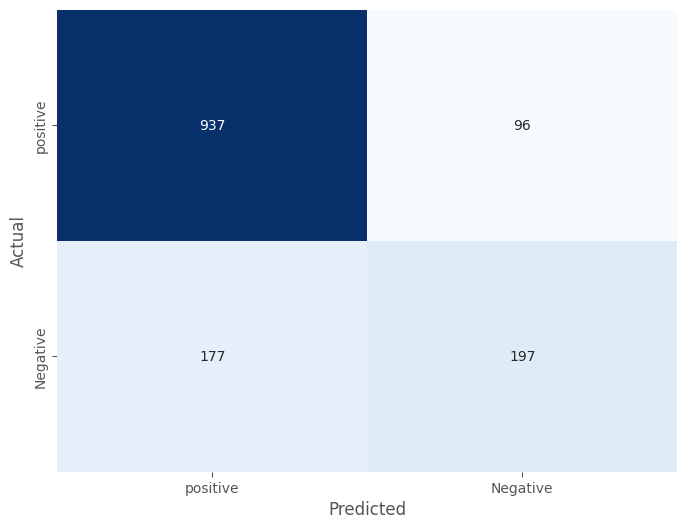

In [227]:
# visualize the metrics 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_eval, y_pred)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [228]:
metrics8 = pd.DataFrame( [['Logistic Regressions', acc5 ,prec5, rec5, f15 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

metrics8 = metrics7.append(metrics8, ignore_index=True)

metrics8

Model  accuracy  precision     recal        f1
0               K Means  0.775409   0.775409  0.775409  0.775409
1         Decision Tree  0.739161   0.739161  0.739161  0.739161
2     Gradient Boosting  0.805259   0.805259  0.805259  0.805259
3         Random Forest  0.778962   0.778962  0.778962  0.778962
4  Logistic Regressions  0.805970   0.805970  0.805970  0.805970

## **MODEL 6: SUPPORT VECTOR MODEL**

In [230]:
from sklearn import svm # although is not a class but svm.SVC is its class

Create an instance (create 2 different classes)

In [233]:
# instance 1 linear is not specified
svm_non_linear = svm.SVC()

# instance 2 linear is specified
svm_linear = svm.SVC(kernel='linear')

**Train the 2 different models**

In [235]:
# model 1 
svm_non_linear.fit(X_train, y_train)

SVC()

In [236]:
# model 2
svm_linear.fit(X_train, y_train)

SVC(kernel='linear')

**Make predictions**

In [241]:
y_pred_linear = svm_linear.predict(X_eval)

pd.DataFrame(y_pred_linear).head()

0
0  1
1  0
2  0
3  1
4  0

In [242]:
y_pred_non_linear = svm_non_linear.predict(X_eval)

pd.DataFrame(y_pred_non_linear).head()

0
0  1
1  0
2  0
3  1
4  0

**Evaluate metrics**

In [248]:
# Linear 

acc6 = metrics.accuracy_score(y_eval, y_pred_linear)
prec6 = metrics.precision_score(y_eval, y_pred_linear,average='micro')
rec6 = metrics.recall_score(y_eval, y_pred_linear,average='micro')
f16 = metrics.f1_score(y_eval, y_pred_linear,average='micro')

# Non linear
acc7 = metrics.accuracy_score(y_eval, y_pred_non_linear)
prec7 = metrics.precision_score(y_eval, y_pred_non_linear,average='micro')
rec7 = metrics.recall_score(y_eval, y_pred_non_linear,average='micro')
f17 = metrics.f1_score(y_eval, y_pred_non_linear,average='micro')

In [253]:
print ('\n\033[1mEVALUATION METRICS SVM LINEAR\033[0m')
print ('accuracyr svm linear :', acc6)
print ('precision  svm linear :', prec6)
print ('rec  svm linear :', rec6)
print ('f1  svm linear  :', f16)
print ('\n')
print ('\033[1m-------------------------\033[0m')
print ('\033[1mEVALUATION METRICS SVM NON LINEAR\033[0m')
print ('accuracyr svm  non linear :', acc7)
print ('precision  svm non linear :', prec7)
print ('rec  svm non linear :', rec7)
print ('f1  svm non linear  :', f17)


EVALUATION METRICS SVM LINEAR
accuracyr svm linear : 0.8002842928216063
precision  svm linear : 0.8002842928216063
rec  svm linear : 0.8002842928216063
f1  svm linear  : 0.8002842928216063


-------------------------
EVALUATION METRICS SVM NON LINEAR
accuracyr svm  non linear : 0.8017057569296375
precision  svm non linear : 0.8017057569296375
rec  svm non linear : 0.8017057569296375
f1  svm non linear  : 0.8017057569296374


In [256]:
metrics9 = pd.DataFrame( [['SVM Linear', acc6 ,prec6, rec6, f16 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

metrics10 = pd.DataFrame( [['SVM non Linear', acc7 ,prec7, rec7, f17 ]], columns= [ 'Model', 'accuracy', 'precision','recal', 'f1'])

In [254]:
print (metrics.classification_report(y_eval, y_pred_linear))

              precision    recall  f1-score   support

           0       0.84      0.90      0.87      1033
           1       0.66      0.52      0.58       374

    accuracy                           0.80      1407
   macro avg       0.75      0.71      0.72      1407
weighted avg       0.79      0.80      0.79      1407



In [255]:
print (metrics.classification_report(y_eval, y_pred_non_linear))

              precision    recall  f1-score   support

           0       0.82      0.93      0.87      1033
           1       0.70      0.45      0.55       374

    accuracy                           0.80      1407
   macro avg       0.76      0.69      0.71      1407
weighted avg       0.79      0.80      0.79      1407



**Visualize the metrics**

In [267]:
plt.colormaps()

['magma',
 'inferno',
 'plasma',
 'viridis',
 'cividis',
 'twilight',
 'twilight_shifted',
 'turbo',
 'Blues',
 'BrBG',
 'BuGn',
 'BuPu',
 'CMRmap',
 'GnBu',
 'Greens',
 'Greys',
 'OrRd',
 'Oranges',
 'PRGn',
 'PiYG',
 'PuBu',
 'PuBuGn',
 'PuOr',
 'PuRd',
 'Purples',
 'RdBu',
 'RdGy',
 'RdPu',
 'RdYlBu',
 'RdYlGn',
 'Reds',
 'Spectral',
 'Wistia',
 'YlGn',
 'YlGnBu',
 'YlOrBr',
 'YlOrRd',
 'afmhot',
 'autumn',
 'binary',
 'bone',
 'brg',
 'bwr',
 'cool',
 'coolwarm',
 'copper',
 'cubehelix',
 'flag',
 'gist_earth',
 'gist_gray',
 'gist_heat',
 'gist_ncar',
 'gist_rainbow',
 'gist_stern',
 'gist_yarg',
 'gnuplot',
 'gnuplot2',
 'gray',
 'hot',
 'hsv',
 'jet',
 'nipy_spectral',
 'ocean',
 'pink',
 'prism',
 'rainbow',
 'seismic',
 'spring',
 'summer',
 'terrain',
 'winter',
 'Accent',
 'Dark2',
 'Paired',
 'Pastel1',
 'Pastel2',
 'Set1',
 'Set2',
 'Set3',
 'tab10',
 'tab20',
 'tab20b',
 'tab20c',
 'magma_r',
 'inferno_r',
 'plasma_r',
 'viridis_r',
 'cividis_r',
 'twilight_r',
 'twilight

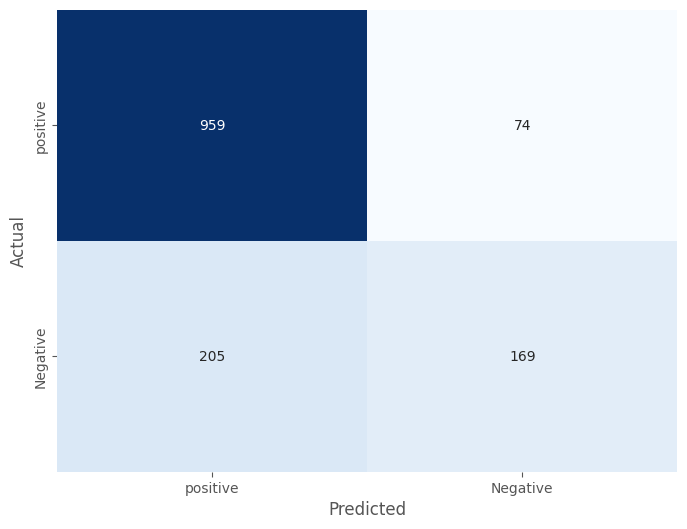

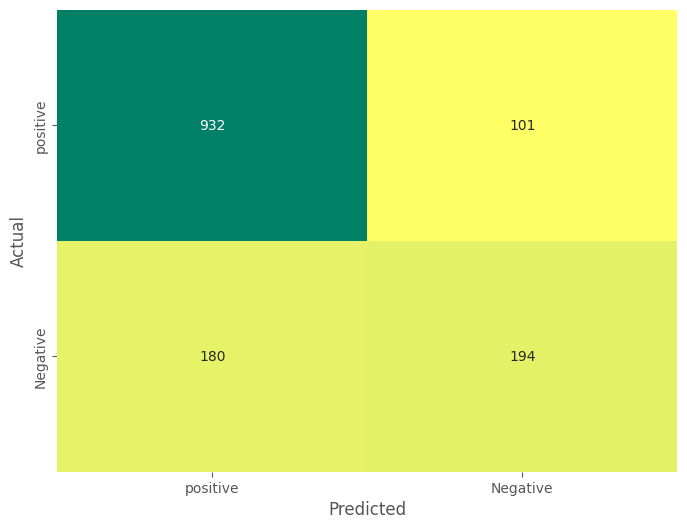

In [269]:
# visualize the metrics 

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_eval, y_pred_non_linear)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,xticklabels= x, yticklabels= y )

#plt.title('svm non linear')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# visualize the metrics 


cm = confusion_matrix(y_eval, y_pred_linear)

x = ['positive', 'Negative']
y = ['positive', 'Negative']
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='summer_r', cbar=False,xticklabels= x, yticklabels= y )

#plt.title('svm non linear')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [257]:
metrics11 = metrics9.append([metrics8,metrics10], ignore_index=True)

metrics11

Model  accuracy  precision     recal        f1
0            SVM Linear  0.800284   0.800284  0.800284  0.800284
1               K Means  0.775409   0.775409  0.775409  0.775409
2         Decision Tree  0.739161   0.739161  0.739161  0.739161
3     Gradient Boosting  0.805259   0.805259  0.805259  0.805259
4         Random Forest  0.778962   0.778962  0.778962  0.778962
5  Logistic Regressions  0.805970   0.805970  0.805970  0.805970
6        SVM non Linear  0.801706   0.801706  0.801706  0.801706

## **MODEL 8: ADA BOOST**